In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('bird.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [6]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [7]:
df['FlightYear'] = pd.to_datetime(df['FlightDate']).dt.year

# Group data by year and count the number of bird strikes
yearly_strikes = df.groupby('FlightYear').size()

# Display yearly analysis
print("Yearly Analysis of Bird Strikes in the US:")
print(yearly_strikes)

Yearly Analysis of Bird Strikes in the US:
FlightYear
2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
dtype: int64


# Yearly Analysis

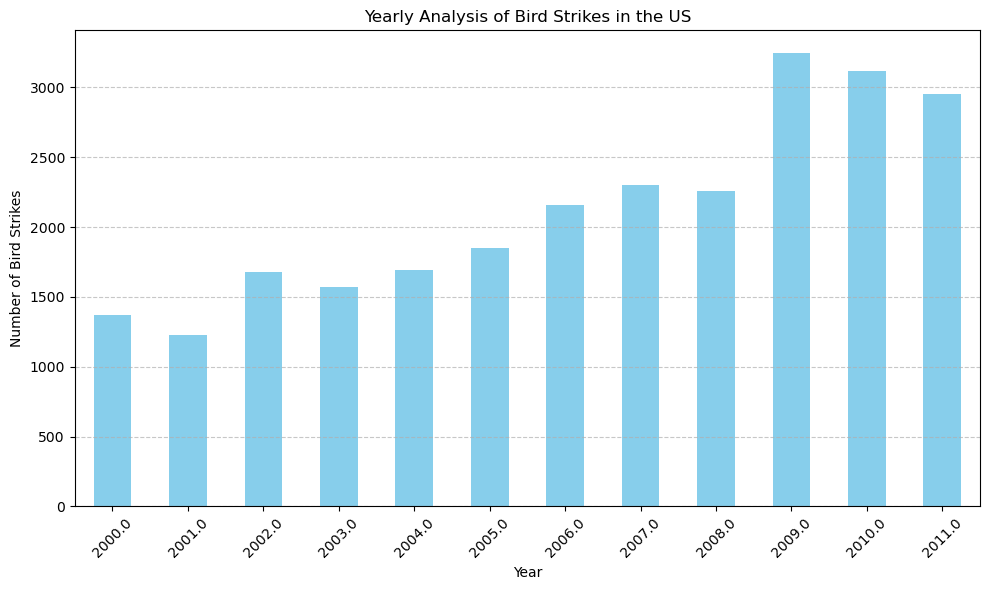

In [8]:
plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='bar', color='skyblue')
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bird Strike in US


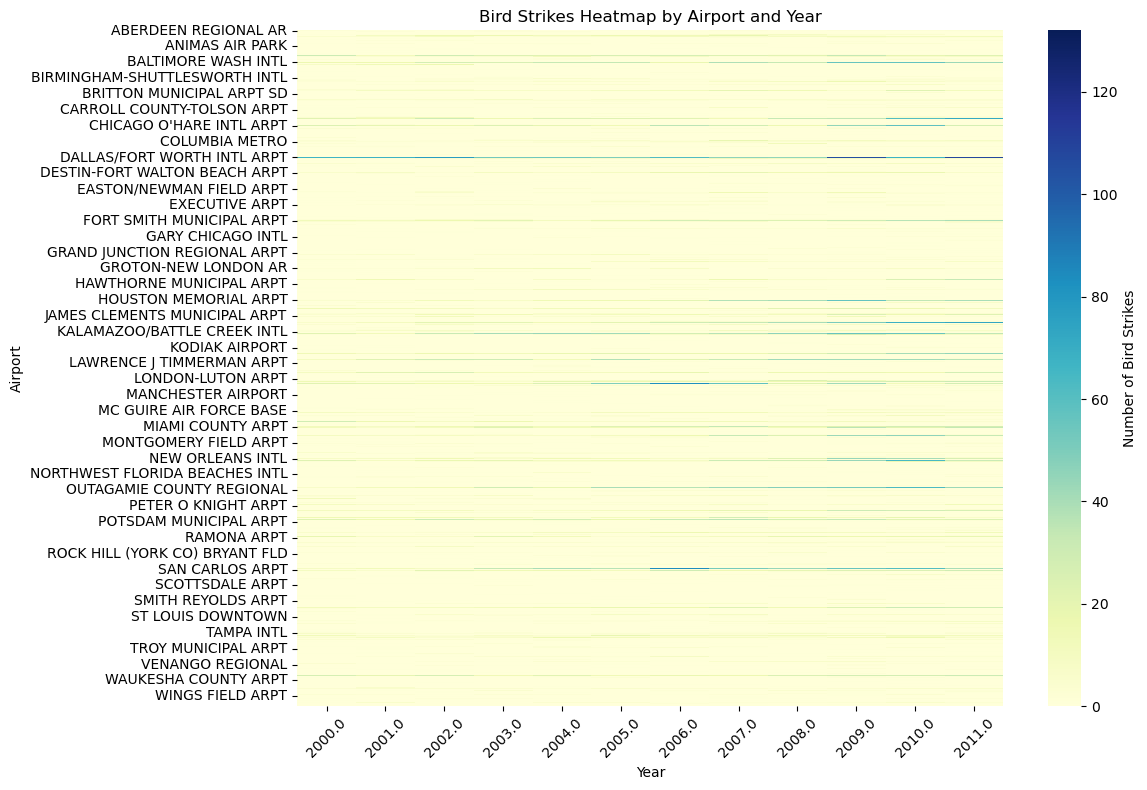

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', cbar_kws={'label': 'Number of Bird Strikes'})
plt.title('Bird Strikes Heatmap by Airport and Year')
plt.xlabel('Year')
plt.ylabel('Airport')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Airlines having encountered bird strike


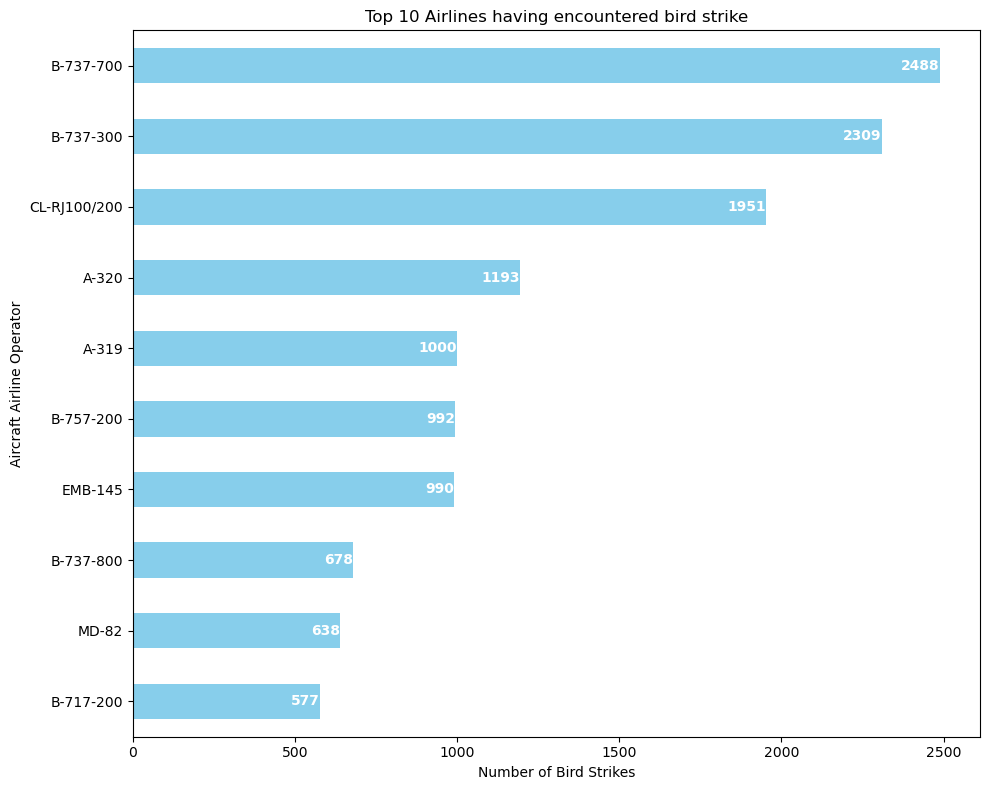

In [25]:
bird_strikes_by_operator = df['Aircraft: Make/Model'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 8))
bird_strikes_by_operator.plot(kind='barh', color='skyblue')
plt.title('Top 10 Airlines having encountered bird strike')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft Airline Operator')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Add text labels to the bars
for index, value in enumerate(bird_strikes_by_operator):
    plt.text(value, index, str(value), ha='right', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Airports with most incidents of bird strikes


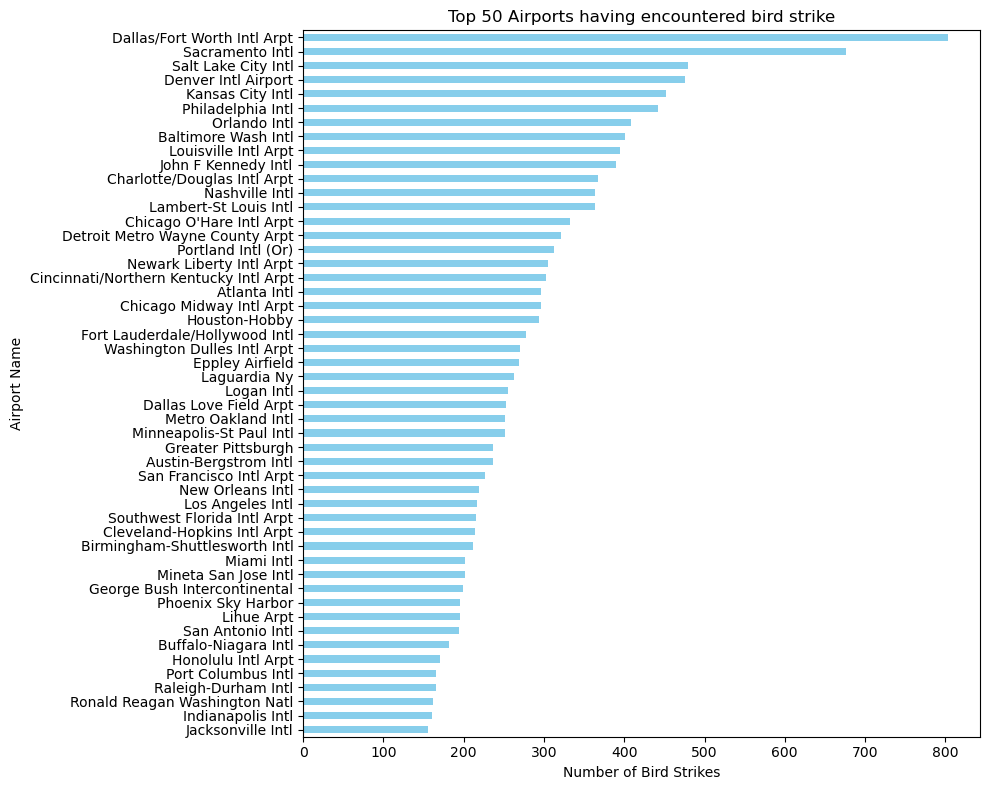

In [24]:
df['Airport: Name'] = df['Airport: Name'].str.title()

# Group the data by airport name and count the number of bird strikes
bird_strikes_by_airport = df['Airport: Name'].value_counts().head(50)

# Create a bar plot
plt.figure(figsize=(10, 8))
bird_strikes_by_airport.plot(kind='barh', color='skyblue')
plt.title('Top 50 Airports having encountered bird strike')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()

# Yearly cost incured due to bird strike


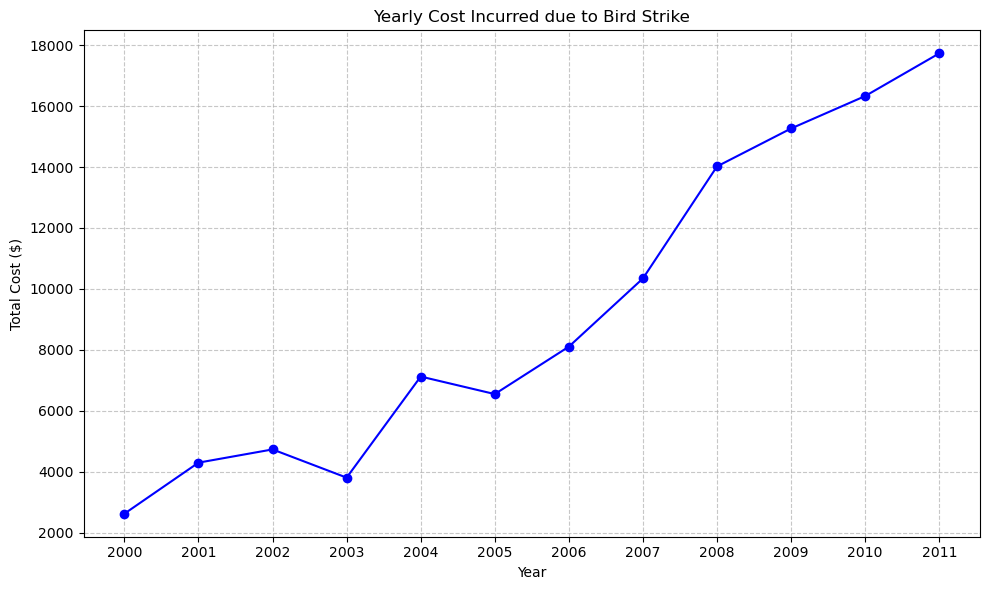

In [29]:
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')

# Drop rows with NaN values in the 'Cost: Total $' column
df.dropna(subset=['Cost: Total $'], inplace=True)

# Group the data by year and calculate the total cost incurred due to bird strikes
yearly_cost = df.groupby('FlightYear')['Cost: Total $'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
yearly_cost.plot(marker='o', color='blue', linestyle='-')
plt.title('Yearly Cost Incurred due to Bird Strike')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.xticks(yearly_cost.index)  # Set x-axis ticks to match the years
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# When do most bird strikes occur


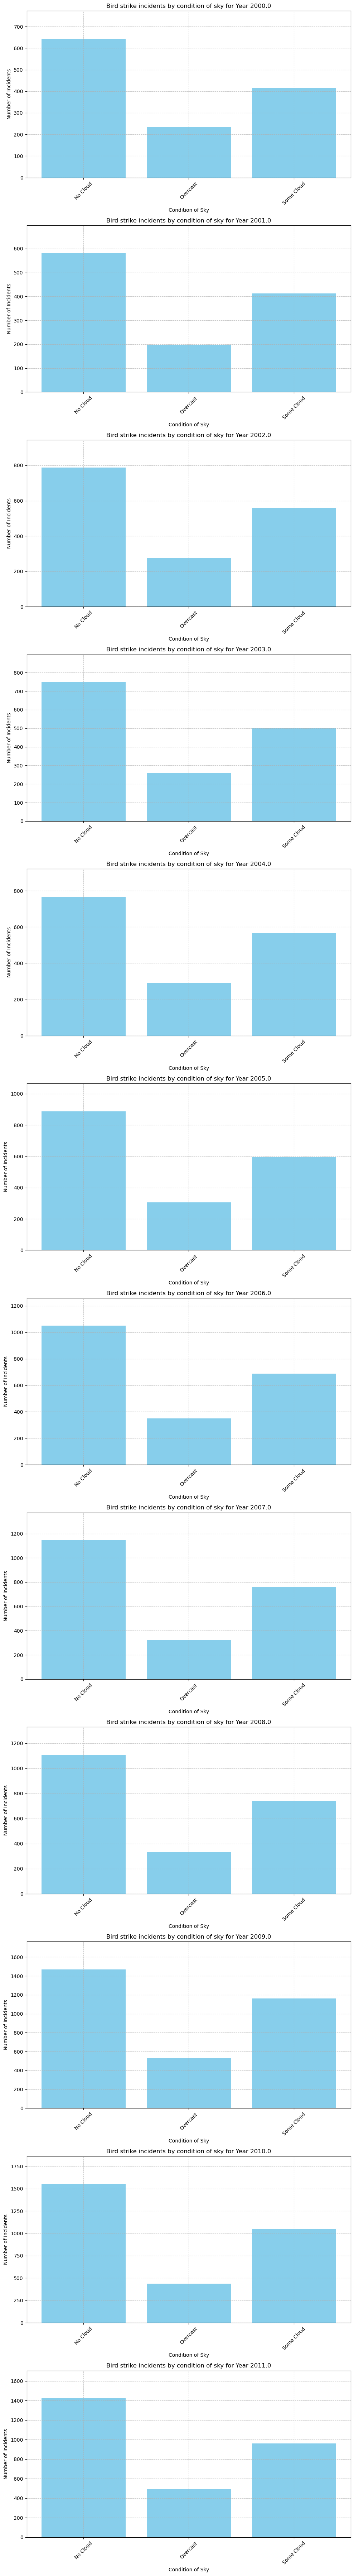

In [30]:
df_filtered = df.dropna(subset=['FlightYear'])

# Group the filtered data by year and condition of sky, and count the number of incidents
bird_strikes_by_sky_condition = df_filtered.groupby(['FlightYear', 'Conditions: Sky']).size().reset_index(name='Count')

# Create subplots for each year
fig, axs = plt.subplots(len(bird_strikes_by_sky_condition['FlightYear'].unique()), 1, figsize=(10, 6*len(bird_strikes_by_sky_condition['FlightYear'].unique())))

# Iterate over each year and plot
for i, year in enumerate(bird_strikes_by_sky_condition['FlightYear'].unique()):
    # Filter data for the current year
    data_year = bird_strikes_by_sky_condition[bird_strikes_by_sky_condition['FlightYear'] == year]
    
    # Create a bar plot for the current year
    axs[i].bar(data_year['Conditions: Sky'], data_year['Count'], color='skyblue')
    axs[i].set_title(f'Bird strike incidents by condition of sky for Year {year}')
    axs[i].set_xlabel('Condition of Sky')
    axs[i].set_ylabel('Number of Incidents')
    axs[i].grid(True, linestyle='--', alpha=0.7)
    axs[i].set_ylim(0, max(data_year['Count']) * 1.2)  # Adjust y-axis limits
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# Altitude of Airplane at the time of bird strike

/var/folders/j0/010hmlw122zfxdhtm_llx0c40000gn/T/ipykernel_2559/3257404275.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])  # Convert y-axis labels to percentages


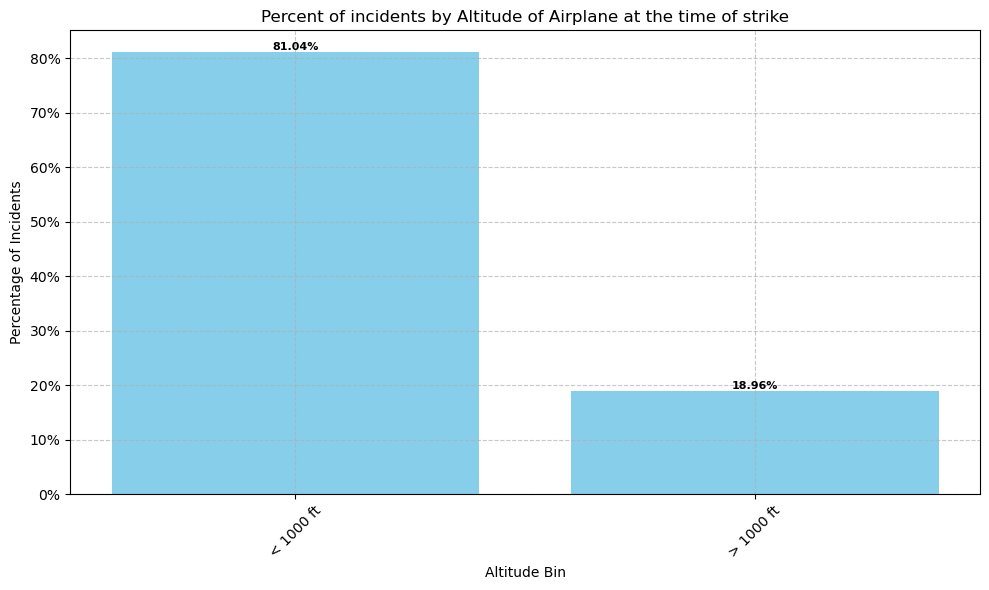

In [31]:
df_filtered = df.dropna(subset=['Altitude bin'])

# Count the number of incidents for each altitude bin
altitude_bin_counts = df_filtered['Altitude bin'].value_counts().reset_index()
altitude_bin_counts.columns = ['Altitude bin', 'Count']

# Calculate the total number of incidents
total_incidents = altitude_bin_counts['Count'].sum()

# Calculate the percentage of incidents for each altitude bin
altitude_bin_counts['Percentage'] = altitude_bin_counts['Count'] / total_incidents

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(altitude_bin_counts['Altitude bin'], altitude_bin_counts['Percentage'], color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height*100:.2f}%", ha='center', va='bottom', 
             fontsize=8, fontweight='bold', color='black')

plt.title('Percent of incidents by Altitude of Airplane at the time of strike')
plt.xlabel('Altitude Bin')
plt.ylabel('Percentage of Incidents')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])  # Convert y-axis labels to percentages
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

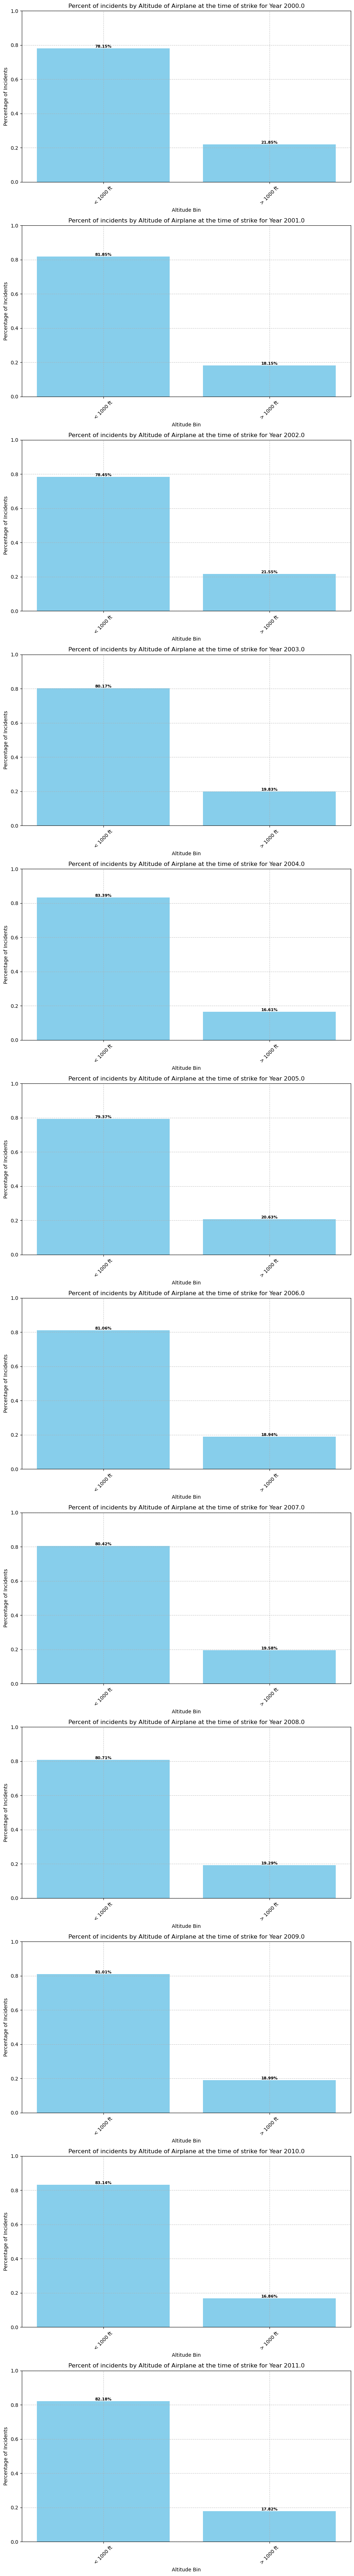

In [32]:
df_filtered = df.dropna(subset=['Altitude bin'])

# Group the filtered data by year and altitude bin, and count the number of incidents
yearly_altitude_bin_counts = df_filtered.groupby(['FlightYear', 'Altitude bin']).size().reset_index(name='Count')

# Calculate the total number of incidents for each year
yearly_total_incidents = yearly_altitude_bin_counts.groupby('FlightYear')['Count'].sum()

# Merge the total incident counts back to the main DataFrame
yearly_altitude_bin_counts = yearly_altitude_bin_counts.merge(yearly_total_incidents, on='FlightYear', suffixes=('', '_total'))

# Calculate the percentage of incidents for each altitude bin within each year
yearly_altitude_bin_counts['Percentage'] = yearly_altitude_bin_counts['Count'] / yearly_altitude_bin_counts['Count_total']

# Create subplots for each year
fig, axs = plt.subplots(len(yearly_altitude_bin_counts['FlightYear'].unique()), 1, figsize=(10, 6*len(yearly_altitude_bin_counts['FlightYear'].unique())))

# Iterate over each year and plot
for i, year in enumerate(yearly_altitude_bin_counts['FlightYear'].unique()):
    # Filter data for the current year
    data_year = yearly_altitude_bin_counts[yearly_altitude_bin_counts['FlightYear'] == year]
    
    # Create a bar plot for the current year
    bars = axs[i].bar(data_year['Altitude bin'], data_year['Percentage'], color='skyblue')
    axs[i].set_title(f'Percent of incidents by Altitude of Airplane at the time of strike for Year {year}')
    axs[i].set_xlabel('Altitude Bin')
    axs[i].set_ylabel('Percentage of Incidents')
    axs[i].set_ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for percentage
    axs[i].grid(True, linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Add text labels to the bars
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f"{height*100:.2f}%", ha='center', va='bottom', 
                    fontsize=8, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Phase of flight at the time of strike

/var/folders/j0/010hmlw122zfxdhtm_llx0c40000gn/T/ipykernel_2559/1165605454.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])  # Convert y-axis labels to percentages


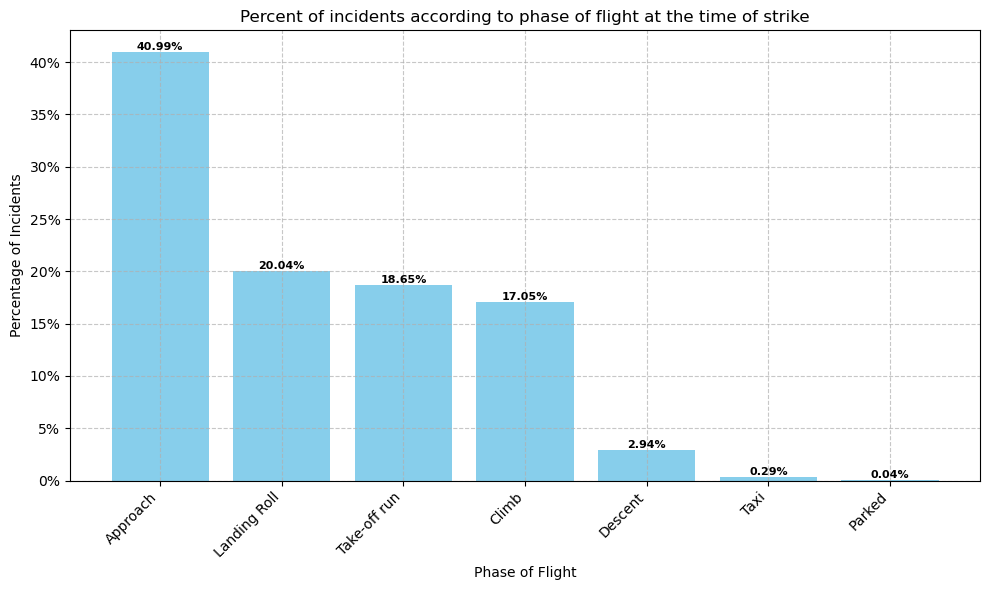

In [40]:
df_filtered = df.dropna(subset=['When: Phase of flight'])

# Count the number of incidents for each phase of flight
phase_of_flight_counts = df_filtered['When: Phase of flight'].value_counts().reset_index()
phase_of_flight_counts.columns = ['Phase of Flight', 'Count']

# Calculate the total number of incidents
total_incidents = phase_of_flight_counts['Count'].sum()

# Calculate the percentage of incidents for each phase of flight
phase_of_flight_counts['Percentage'] = phase_of_flight_counts['Count'] / total_incidents

# Sort the DataFrame by percentage in descending order
phase_of_flight_counts = phase_of_flight_counts.sort_values(by='Percentage', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(phase_of_flight_counts['Phase of Flight'], phase_of_flight_counts['Percentage'], color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height*100:.2f}%", ha='center', va='bottom', 
             fontsize=8, fontweight='bold', color='black')

plt.title('Percent of incidents according to phase of flight at the time of strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Percentage of Incidents')
plt.xticks(rotation=45, ha='right')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])  # Convert y-axis labels to percentages
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average Altitude of airplanes at diffeernet phases of flight

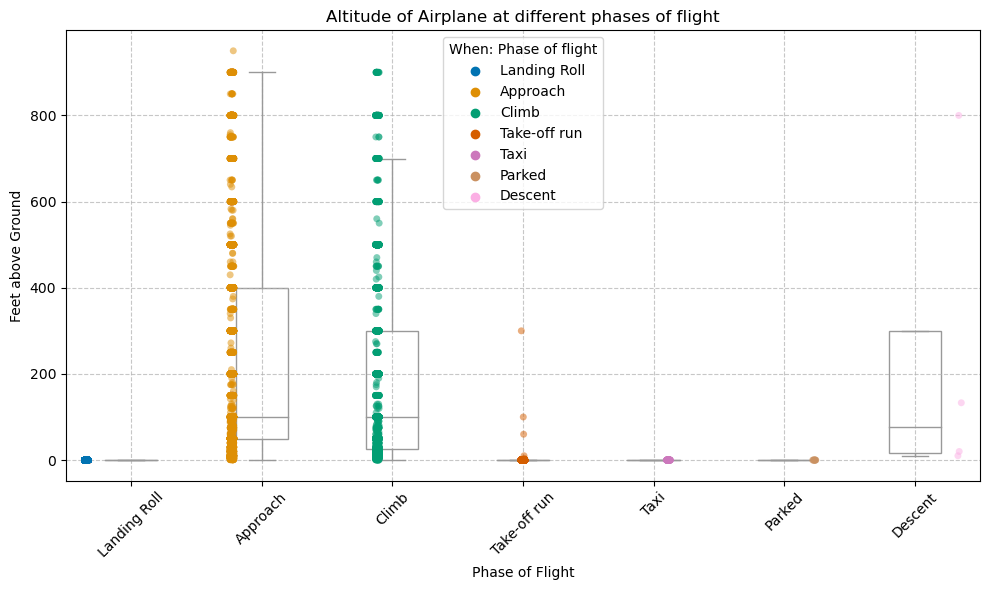

In [43]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Drop rows with NaN values in 'Feet above ground' column
df_filtered = df.dropna(subset=['When: Phase of flight', 'Feet above ground'])

# Create the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with jitter for each phase of flight
sns.stripplot(x='When: Phase of flight', y='Feet above ground', data=df_filtered, hue='When: Phase of flight', 
              palette='colorblind', dodge=True, alpha=0.5, jitter=True)

# Create boxplots for each phase of flight
sns.boxplot(x='When: Phase of flight', y='Feet above ground', data=df_filtered, color='white', 
            width=0.4, linewidth=1, fliersize=0)

# Set the title and labels
plt.title('Altitude of Airplane at different phases of flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Feet above Ground')

# Show the plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Effect of Bird Strikes# Effect of Bird Strikes

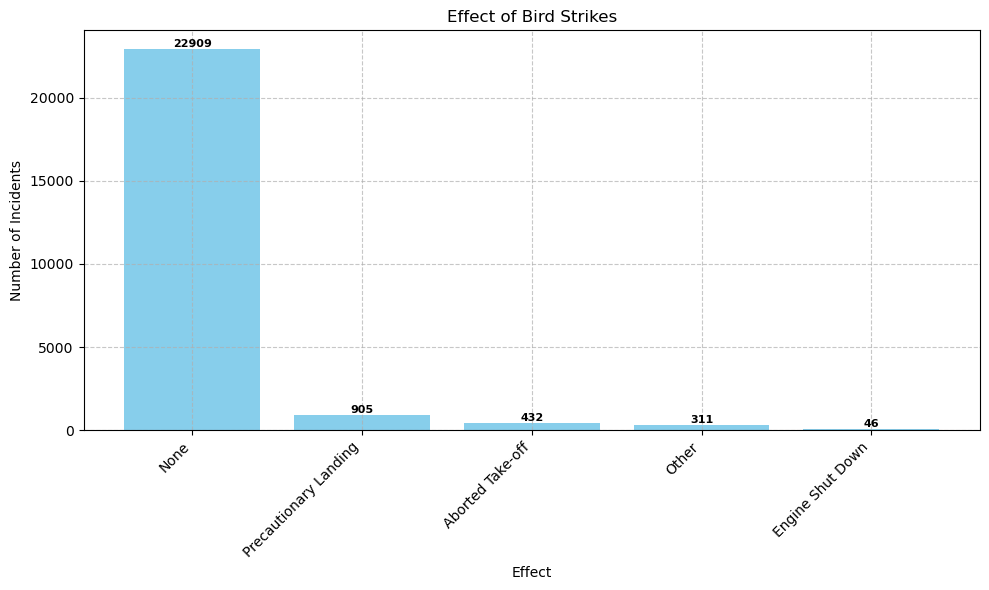

In [44]:
df_filtered = df.dropna(subset=['Effect: Impact to flight'])

# Count the number of occurrences for each effect
effect_counts = df_filtered['Effect: Impact to flight'].value_counts().reset_index()
effect_counts.columns = ['Effect', 'Count']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(effect_counts['Effect'], effect_counts['Count'], color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', 
             fontsize=8, fontweight='bold', color='black')

plt.title('Effect of Bird Strikes')
plt.xlabel('Effect')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Impact on Flights

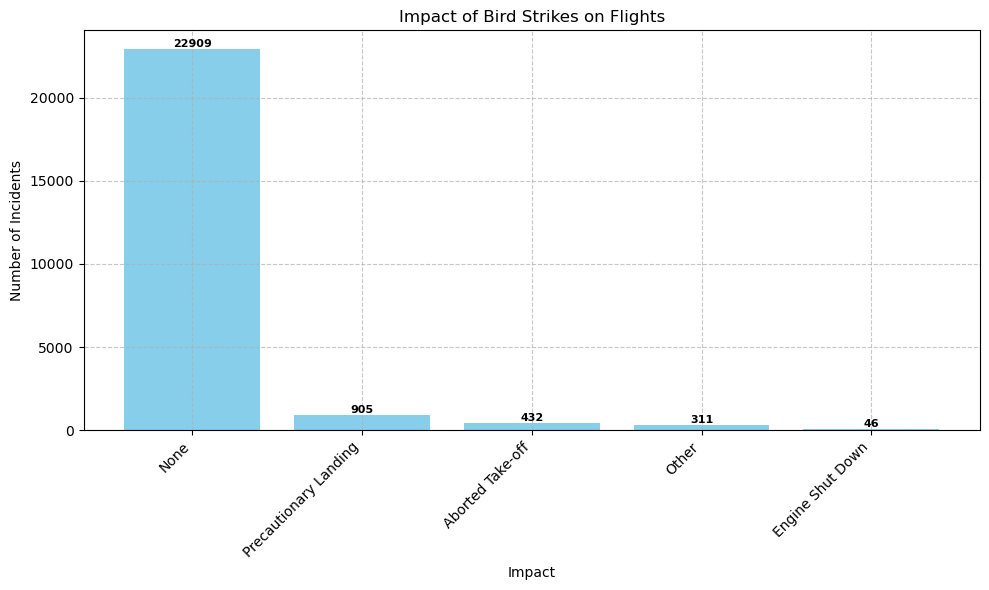

In [45]:
df_filtered = df.dropna(subset=['Effect: Impact to flight'])

# Count the number of occurrences for each impact
impact_counts = df_filtered['Effect: Impact to flight'].value_counts().reset_index()
impact_counts.columns = ['Impact', 'Count']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(impact_counts['Impact'], impact_counts['Count'], color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', 
             fontsize=8, fontweight='bold', color='black')

plt.title('Impact of Bird Strikes on Flights')
plt.xlabel('Impact')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Does Pilot warned about birds?

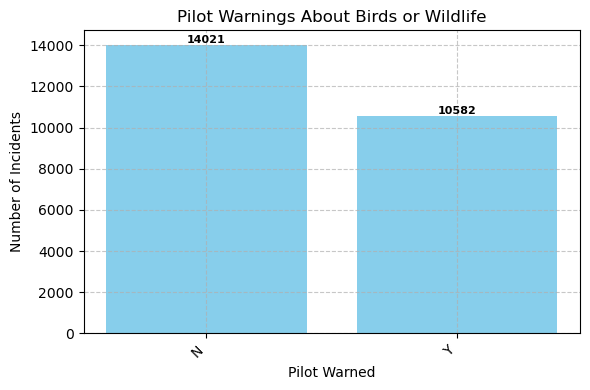

In [49]:
# Assuming df is your DataFrame containing the bird strike data

# Filter out rows with missing values in the 'Pilot warned of birds or wildlife?' column
df_filtered = df.dropna(subset=['Pilot warned of birds or wildlife?'])

# Count the number of occurrences for each warning status
warning_counts = df_filtered['Pilot warned of birds or wildlife?'].value_counts().reset_index()
warning_counts.columns = ['Warning', 'Count']

# Create the plot
plt.figure(figsize=(6, 4))
bars = plt.bar(warning_counts['Warning'], warning_counts['Count'], color='skyblue')

# Add text labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', 
             fontsize=8, fontweight='bold', color='black')

plt.title('Pilot Warnings About Birds or Wildlife')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Relation between prior warning and effect of strike

<Figure size 1000x600 with 0 Axes>

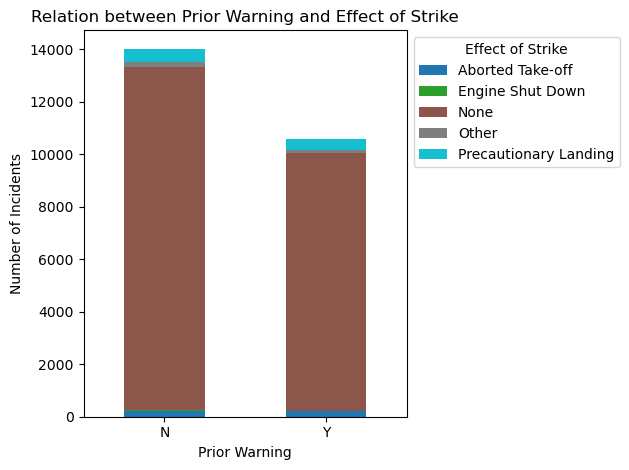

In [53]:
df_filtered = df.dropna(subset=['Pilot warned of birds or wildlife?', 'Effect: Impact to flight'])

cross_tab = pd.crosstab(df_filtered['Pilot warned of birds or wildlife?'], df_filtered['Effect: Impact to flight'])

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Relation between Prior Warning and Effect of Strike')
plt.xlabel('Prior Warning')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.legend(title='Effect of Strike', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()